In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data)) 

In [5]:
noise

array([-1.24942654,  0.25947293, -0.44465168, ..., -1.54181943,
        0.64065258, -0.56529031])

we will just follow this 

y = mx + b


b = 5

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
 x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [8]:
y_df  = pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

,X Data,Y
0,0.00000,3.750573
1,0.00001,5.259478
2,0.00002,4.555358
3,0.00003,6.907065
4,0.00004,5.993446


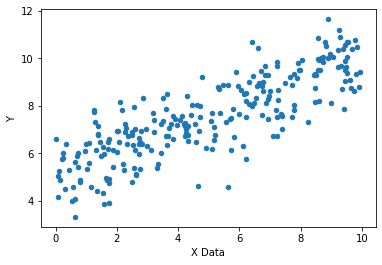

In [12]:
my_data.sample(n=250).plot(kind='scatter',x='X Data', y='Y')

In [13]:
batch_size = 8
m = tf.Variable(0.81)
b = tf.Variable(0.71)

In [14]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [15]:
y_model = m*xph + b

In [16]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [18]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    
    model_m , model_b = sess.run([m,b])

In [21]:
model_m

0.43455812

In [22]:
model_b

4.9197297

In [24]:
y_hat = x_data * model_m + model_b

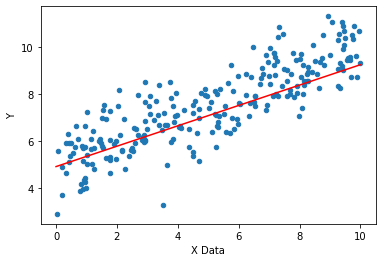

In [25]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')